<h3>REVIEWS RATING ESTIMATOR</h3>

<p> This is a project that estimates ratings based on customer reviews.The purpose of such an application is to help identify ratings for reviews where the user ratings are missing. This rating could be used to further analyze the success rate of your product.</p>
<p>The dataset used for this project is a boardgamegeek review dataset available at Kaggle here: 
    <a href="https://www.kaggle.com/jvanelteren/boardgamegeek-reviews">Dataset</a> This model will also work for other kinds of dataset for e.g. Movie review dataset for IMDB, Restaurant review dataset etc. </p>
    <p>Naive Bayes model is implemented with bag of words as the final training model.The various steps involved in the creation of the model are described in detail over the ipynb.</p>
    

<h3> Reading the data </h3>
<p>The first step is to read the data and convert it to a pandas dataframe</p>

In [2]:
import pandas as pd

df = pd.read_csv('D:/UTA/Fall-2020/DM/TermProject/archive/bgg-15m-reviews.csv')
del df['Unnamed: 0']


<h4>Dropping rows that have missing comments(NaN)</h4>

<p>This step is essential because we have to get a dataset that contains reviews in order to train our model. So removal of ratings without review is executed.</p>

In [3]:
#Dropping rows with missing reviews 
temp_dataset = df.dropna().reset_index(drop=True)
temp_dataset


,user,rating,comment,ID,name
0,mitnachtKAUBO-I,10.0,Hands down my favorite new game of BGG CON 200...,30549,Pandemic
1,avlawn,10.0,I tend to either love or easily tire of co-op ...,30549,Pandemic
2,Mease19,10.0,This is an amazing co-op game. I play mostly ...,30549,Pandemic
3,cfarrell,10.0,Hey! I can finally rate this game I've been pl...,30549,Pandemic
4,gregd,10.0,Love it- great fun with my son. 2 plays so far...,30549,Pandemic
...,...,...,...,...,...
2995018,ChiefMe,10.0,KS Collector's Bundle with a friend of mine,281515,Company of Heroes
2995019,Mukaz,10.0,Belekokio Gerumo...,281515,Company of Heroes
2995020,jpaquila,10.0,Excelente!! lo mejor que probé.,281515,Company of Heroes
2995021,Fafhrd65,8.0,Turn based preview looks very promising. The g...,281515,Company of Heroes


<p>Use the 'Reviews' and the corresponding 'Rating' columns as the dataset</p>

In [4]:
dataset = temp_dataset[['comment', 'rating']].copy()
dataset.columns = ['Reviews','Rating']
dataset

,Reviews,Rating
0,Hands down my favorite new game of BGG CON 200...,10.0
1,I tend to either love or easily tire of co-op ...,10.0
2,This is an amazing co-op game. I play mostly ...,10.0
3,Hey! I can finally rate this game I've been pl...,10.0
4,Love it- great fun with my son. 2 plays so far...,10.0
...,...,...
2995018,KS Collector's Bundle with a friend of mine,10.0
2995019,Belekokio Gerumo...,10.0
2995020,Excelente!! lo mejor que probé.,10.0
2995021,Turn based preview looks very promising. The g...,8.0


<h3> PREPROCESSING </h3>

<p>For preprocessing and cleaning the data in the reviews column, NLTK libraries are used for removing punctuations, stopwords, numbers and lemmatization of the filtered reviews.</p>

In [4]:
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

def sentence_tokenize(text):
    sentences = nltk.sent_tokenize(text)
    return sentences
    

def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    new_text = re.sub(pattern, '', text)
    return new_text

def remove_numbers(text):
    text = re.sub('\w*\d\w*', "",text)
    return text

def word_tokenize(text):
    #remove punctuations
    tokeniser = nltk.tokenize.RegexpTokenizer(r'\w+')
    tokens = (tokeniser.tokenize(text))
    return tokens
    
def lemmatization(text):
    lemmatiser = WordNetLemmatizer()
    lemmas = [lemmatiser.lemmatize(token, pos='v') for token in text]
    return lemmas
    
def remove_stopwords(text):
    stopwords = nltk.corpus.stopwords.words('english')
    new_text = [word for word in text if word not in stopwords]
    return new_text

def list_to_string(str2):  
    str1 = " "   
    return (str1.join(str2)) 
    

<h4>At this step changing the words in the reviews to lowercase, removing of certain patterns and numbers is performed</h4>

In [5]:
lower_case_dataset = pd.DataFrame(dataset.Reviews.apply(lambda x: x.lower()))
reviews_without_htmltags_df =  pd.DataFrame(lower_case_dataset.Reviews.apply(lambda x: remove_html_tags(x)))
reviews_without_htmltags_df =  pd.DataFrame(reviews_without_htmltags_df.Reviews.apply(lambda x: remove_numbers(x)))
reviews_without_htmltags_df

,Reviews
0,hands down my favorite new game of bgg con . ...
1,i tend to either love or easily tire of co-op ...
2,this is an amazing co-op game. i play mostly ...
3,hey! i can finally rate this game i've been pl...
4,love it- great fun with my son. plays so far ...
...,...
2995018,ks collector's bundle with a friend of mine
2995019,belekokio gerumo...
2995020,excelente!! lo mejor que probé.
2995021,turn based preview looks very promising. the g...


<h4>Here sentence tokenization,word tokenization and removal of stop words is performed</h4>

In [6]:
reviews_without_htmltags_df['Reviews_sentence_tokenized'] = reviews_without_htmltags_df['Reviews']
reviews_without_htmltags_df['Reviews_sentence_tokenized'] = reviews_without_htmltags_df['Reviews'].apply(lambda x: sentence_tokenize(x))

#word tokenizing
reviews_without_htmltags_df['Reviews_word_tokenized'] = reviews_without_htmltags_df['Reviews']
reviews_without_htmltags_df['Reviews_word_tokenized'] = reviews_without_htmltags_df['Reviews'].apply(lambda x: word_tokenize(x))

#removing stop words
reviews_without_htmltags_df['Reviews_without_stopwords'] = reviews_without_htmltags_df['Reviews_word_tokenized'].apply(lambda x: remove_stopwords(x))
reviews_without_htmltags_df

,Reviews,Reviews_sentence_tokenized,Reviews_word_tokenized,Reviews_without_stopwords
0,hands down my favorite new game of bgg con . ...,"[hands down my favorite new game of bgg con .,...","[hands, down, my, favorite, new, game, of, bgg...","[hands, favorite, new, game, bgg, con, played,..."
1,i tend to either love or easily tire of co-op ...,[i tend to either love or easily tire of co-op...,"[i, tend, to, either, love, or, easily, tire, ...","[tend, either, love, easily, tire, co, op, gam..."
2,this is an amazing co-op game. i play mostly ...,"[this is an amazing co-op game., i play mostly...","[this, is, an, amazing, co, op, game, i, play,...","[amazing, co, op, game, play, mostly, wife, ga..."
3,hey! i can finally rate this game i've been pl...,"[hey!, i can finally rate this game i've been ...","[hey, i, can, finally, rate, this, game, i, ve...","[hey, finally, rate, game, playtesting, couple..."
4,love it- great fun with my son. plays so far ...,"[love it- great fun with my son., plays so far...","[love, it, great, fun, with, my, son, plays, s...","[love, great, fun, son, plays, far, looking, f..."
...,...,...,...,...
2995018,ks collector's bundle with a friend of mine,[ks collector's bundle with a friend of mine],"[ks, collector, s, bundle, with, a, friend, of...","[ks, collector, bundle, friend, mine]"
2995019,belekokio gerumo...,[belekokio gerumo...],"[belekokio, gerumo]","[belekokio, gerumo]"
2995020,excelente!! lo mejor que probé.,"[excelente!!, lo mejor que probé.]","[excelente, lo, mejor, que, probé]","[excelente, lo, mejor, que, probé]"
2995021,turn based preview looks very promising. the g...,"[turn based preview looks very promising., the...","[turn, based, preview, looks, very, promising,...","[turn, based, preview, looks, promising, game,..."


<h4>Lemmatization</h4>
<p>Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma . If confronted with the token saw, stemming might return just s, whereas lemmatization would attempt to return either see or saw depending on whether the use of the token was as a verb or a noun. The two may also differ in that stemming most commonly collapses derivationally related words, whereas lemmatization commonly only collapses the different inflectional forms of a lemma. </p>

In [7]:
#performing lemmatization as a preprocessing step
reviews_lemmatized = pd.DataFrame(reviews_without_htmltags_df['Reviews_without_stopwords'].apply(lambda x: lemmatization(x)))

In [8]:
reviews_lemmatized.columns = ['Reviews']
reviews_lemmatized

,Reviews
0,"[hand, favorite, new, game, bgg, con, play, ti..."
1,"[tend, either, love, easily, tire, co, op, gam..."
2,"[amaze, co, op, game, play, mostly, wife, game..."
3,"[hey, finally, rate, game, playtesting, couple..."
4,"[love, great, fun, son, play, far, look, forward]"
...,...
2995018,"[ks, collector, bundle, friend, mine]"
2995019,"[belekokio, gerumo]"
2995020,"[excelente, lo, mejor, que, probé]"
2995021,"[turn, base, preview, look, promise, game, pre..."


In [9]:
dataset['Reviews'] = reviews_lemmatized['Reviews'].apply(lambda x: list_to_string(x))
#dataset['Reviews'] = reviews_lemmatized

<h4>Processed Dataset</h4>
<p>The ratings are rounded to the nearest integer to get a rating in the scale of 1-10. This cleaned and pre-processed dataset is then used for training and testing our algorithm</p>

In [5]:
import numpy as np
#Round the ratings to the nearest integer
newdf = dataset['Rating'].astype(np.int64)
dataset['Rating'] = newdf
#final dataset with pre-processed reviews
dataset

,Reviews,Rating
0,Hands down my favorite new game of BGG CON 200...,10
1,I tend to either love or easily tire of co-op ...,10
2,This is an amazing co-op game. I play mostly ...,10
3,Hey! I can finally rate this game I've been pl...,10
4,Love it- great fun with my son. 2 plays so far...,10
...,...,...
2995018,KS Collector's Bundle with a friend of mine,10
2995019,Belekokio Gerumo...,10
2995020,Excelente!! lo mejor que probé.,10
2995021,Turn based preview looks very promising. The g...,8


<h3> Splitting dataset into train and test </h3>
<p>We split the dataset in the ratio 4:1 to get the training and the test dataset respectively</p>

In [6]:
import numpy as np

train_df,test_df = np.split(dataset, [int(.8*len(dataset))])
print("training: ",train_df.shape)
print("test: ",test_df.shape)
Y_train = train_df['Rating'].tolist() #ratings for the train dataset
Y_test = test_df['Rating'].tolist() # ratings for the test dataset

training:  (2396018, 2)
test:  (599005, 2)


In [12]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# corpus = train_df['Reviews'].tolist()
# vectorizer = TfidfVectorizer(analyzer = 'word',use_idf = True)
# X = vectorizer.fit_transform(corpus)
# print(vectorizer.get_feature_names())
# print(X.shape)

<h3>CREATING DOCUMENT MATRIX</h3>
<p>In order to get a vocabulary of words with their frequencies we need to utilize sklearn's <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html">CountVectorizer</a>. This gives us a dictionary of words with their corresponding frequencies in each document in vector form. We need the output in a matrix form in order to pass it as an input to our models. </p>
<p>Here the max_features is set to 5000 to get a better accuracy and ignore the less frequent words</p>


In [25]:
from sklearn.feature_extraction.text import CountVectorizer
# Create an instance of CountfVectorizer
vectoriser = CountVectorizer(max_features=5000) # max features is set to 5000 for better accuracy
# Fit to the data and transform to feature matrix
X_train = vectoriser.fit_transform(train_df['Reviews'])
X_test = vectoriser.transform(test_df['Reviews'])

<h4>This is the input of our model in matrix form.</h4>

In [8]:
print(X_train)

  (0, 2033)	1
  (0, 1319)	1
  (0, 2916)	1
  (0, 1672)	1
  (0, 2972)	1
  (0, 1868)	2
  (0, 3059)	3
  (0, 500)	1
  (0, 916)	1
  (0, 37)	1
  (0, 4825)	1
  (0, 3297)	1
  (0, 2357)	2
  (0, 4480)	1
  (0, 2249)	2
  (0, 3755)	1
  (0, 2407)	1
  (0, 4395)	1
  (0, 1957)	2
  (0, 4508)	1
  (0, 419)	1
  (0, 3178)	1
  (0, 4905)	1
  (0, 450)	2
  (0, 4677)	1
  :	:
  (2396016, 3852)	1
  (2396016, 3630)	1
  (2396016, 2773)	1
  (2396017, 1868)	2
  (2396017, 3059)	1
  (2396017, 4395)	1
  (2396017, 4397)	1
  (2396017, 4970)	1
  (2396017, 1836)	1
  (2396017, 683)	1
  (2396017, 3561)	2
  (2396017, 100)	1
  (2396017, 4195)	1
  (2396017, 4410)	1
  (2396017, 4845)	1
  (2396017, 321)	2
  (2396017, 1384)	1
  (2396017, 810)	1
  (2396017, 3031)	1
  (2396017, 2026)	1
  (2396017, 680)	1
  (2396017, 3092)	1
  (2396017, 3966)	1
  (2396017, 2666)	1
  (2396017, 1771)	1


<h3> NAIVE BAYES MODEL IMPLEMENTATION</h3>
<p>This classifier has two probabilities: P(class) which is the probability an input will produce a certain class, and P(input_condition|class) is the probability an input feature has a certain value, given the class. Otherwise, default probability is 0. Multinomial Naïve bayes implements the naive Bayes algorithm for multinomially distributed data, and is one of the two classic naive Bayes variants used in text classification (where the data are typically represented as word vector counts</p>
<p>The <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html"> multinomial naive bayes model</a> provided by sklearn is implemented here. At first the model was executed with default alpha= 1. After performing hyperparameter tuning the alpha is updated to get the best accuracy 27.3%.</p>

In [26]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha = 1.0e-10)
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)#testing the predictions for test dataset once model has been trained
test_df['Predictions'] = Y_pred
print(test_df)
accuracy = clf.score(X_test, np.array(Y_test))
print("Accuracy of test data predictions: ",accuracy*100,"%")

                                                   Reviews  Rating  \
2396018  A small Knizia reworking of Knock Rummy, makin...       6   
2396019  Card game trying to reduce your cards to minim...       6   
2396020  2013-12-17  Initial Rating: 5.5 (December 2013...       5   
2396021                                        3-5, best 4       5   
2396022  A friend of mine loves this game, so I get suc...       5   
...                                                    ...     ...   
2995018        KS Collector's Bundle with a friend of mine      10   
2995019                                Belekokio Gerumo...      10   
2995020                    Excelente!! lo mejor que probé.      10   
2995021  Turn based preview looks very promising. The g...       8   
2995022                                                 KS       8   

         Predictions  
2396018            7  
2396019            6  
2396020            7  
2396021            8  
2396022            3  
...              ... 

<h3>PERFORMANCE EVALUATION </h3>
<p>For evaluation of the algorithm: accuracy and mean squared error is used as performance measure. Since this is a classification for 10 different classes, the accuracy can be low. So the mean squared error will give us idea how close to the original rating was our predicted rating.</p>

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import numpy as np
Y_true = np.array(Y_test)
mse = mean_squared_error(Y_true, Y_pred)
print("Accuracy:",accuracy_score(Y_true, Y_pred)*100,"%")
print("Mean Squared error:",mse)

Accuracy: 27.301441557249106 %
Mean Squared error: 3.6436256792514254


<h3> HYPERPARAMETER TUNING </h3>
<p>Hyperparameter tuning is done on the smoothing parameter alpha for Multinomial Naive Bayes. The best accuracy obtained against the best alpha value is then used in training the final model.5 fold cross validation is performed and the best accuracy obtained can be seen as 30.9% for this model.For this process sklearn GridSearchCV method is used.</p>
<p>Best results are obtained for alpha=0.0 but recommended alpha value is 1.0e-10 so that is used for training the algorithm</p>

In [16]:
from sklearn.model_selection import GridSearchCV
params = {'alpha': np.array(np.linspace(0,1,100))}
multinomial_nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=3, cv=5, verbose=5,scoring='accuracy')
multinomial_nb_grid.fit(X_train, Y_train)
print('Train Accuracy : %.3f'%multinomial_nb_grid.best_estimator_.score(X_train, Y_train))
print('Test Accuracy : %.3f'%multinomial_nb_grid.best_estimator_.score(X_test, Y_true))
print('Best Accuracy Through Grid Search : %.3f'%multinomial_nb_grid.best_score_)
print('Best Parameters : ',multinomial_nb_grid.best_params_)
results_NB = pd.DataFrame(multinomial_nb_grid.cv_results_['params'])
results_NB['test_score'] = multinomial_nb_grid.cv_results_['mean_test_score']
results_NB

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   38.6s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:  3.6min
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:  9.0min
[Parallel(n_jobs=3)]: Done 282 tasks      | elapsed: 16.6min
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed: 26.7min
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed: 30.2min finished
D:\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Train Accuracy : 0.322
Test Accuracy : 0.273
Best Accuracy Through Grid Search : 0.309
Best Parameters :  {'alpha': 0.0}


,alpha,test_score
0,0.000000,0.308764
1,0.010101,0.308715
2,0.020202,0.308551
3,0.030303,0.308392
4,0.040404,0.308241
...,...,...
95,0.959596,0.307404
96,0.969697,0.307405
97,0.979798,0.307409
98,0.989899,0.307407


<h4>Hyperparameter tuning plot</h4>

In [17]:
#ind = params['alpha'].index(multinomial_nb_grid.best_params_['alpha'])
ind = np.where(params['alpha'] == multinomial_nb_grid.best_params_['alpha'])
print(ind)

(array([0], dtype=int64),)


No handles with labels found to put in legend.


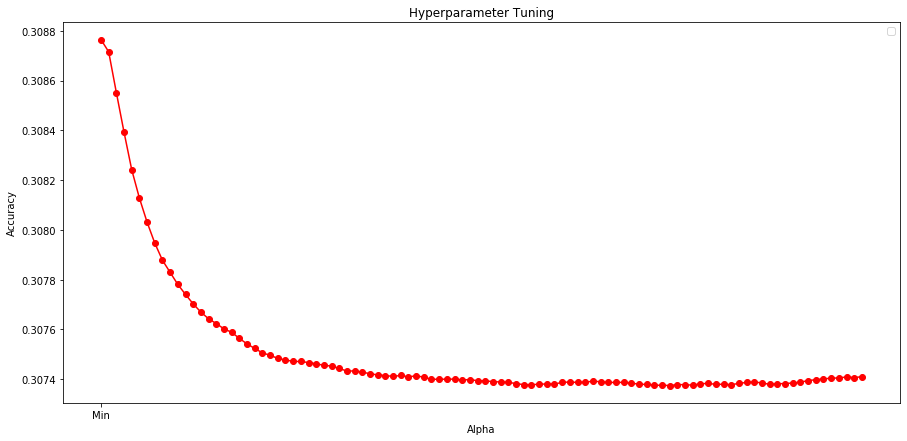

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,7)

fig, ax = plt.subplots(1) 
ax.plot(results_NB['alpha'], results_NB['test_score'],'ro-')
ax.set_title('Hyperparameter Tuning')
ax.set(xlabel='Alpha', ylabel='Accuracy')
ax.set_xticks(ind)
ax.set_xticklabels(["Min"])
plt.legend(loc="upper right")

In [22]:
# from sklearn import svm
# clf = svm.SVC()
# clf.fit(X_train, train_df['Rating'])
# accuracy = clf.score(X_test, y)
# print(accuracy)

<h3>Rating estimation for a sample review</h3>

In [28]:
review = input("Enter a review:")
X_test = vectoriser.transform([review])
pred = clf.predict(X_test)
print("The estimated rating is: ", str(pred[0]))
print(clf.predict_proba(vectoriser.transform([review])))

Enter a review: worst game ever


The estimated rating is:  1
[[0.00050085 0.34342433 0.14563466 0.08324017 0.05506273 0.05918964
  0.06744299 0.07450879 0.06177034 0.04813668 0.06108883]]


<h3>Training with the complete dataset</h3>
<p>Now that we have a hyper parameter to get the best results the entire dataset is used to train the model to estimate ratings in the application for best results</p>

In [29]:
X_train_final = vectoriser.fit_transform(dataset['Reviews'])

In [30]:
clf = MultinomialNB(alpha = 1.0e-10)
clf.fit(X_train_final, dataset['Rating'])

MultinomialNB(alpha=1e-10, class_prior=None, fit_prior=True)

<h3>Exporting vectorizer and model to use in deployment server</h3>
<p>Pickle is used to save our model to be used externally. The mentioned files are used in pythonanywhere along with the deployed application.</p>

In [33]:
import pickle
pickle.dump(clf, open('D:/UTA/Fall-2020/DM/TermProject/NaiveBayesClassifier', 'wb'))
with open('D:/UTA/Fall-2020/DM/TermProject/Vectorizer', 'wb') as fin:
        pickle.dump(vectoriser, fin)

<h3>Challenges faced</h3>

 - Due to large dataset model execution time was very high so could not implement SVM for the entire dataset. 
 - Dataset had missing values, reduced the dataset size by removing rows with NaN reviews.
 - The pre-processing step was removed after it was observed that the accuracy is improved by 1% without pre-processing like lemmatization and stop words removal.

<h3>References</h3>

 - Sklearn documentation: [https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
 - [https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)
 - [https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/](https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/)

<p>I did not use any references for the model implementation. Just followed official documentation above and process followed in assignment 3.</p>

<h3>Links</h3>

 - Blog post : https://pxm5568.uta.cloud/img/Maitreyee_02.html 
 - Working model is deployed at: [http://pragnyam.pythonanywhere.com/](http://pragnyam.pythonanywhere.com/ )
 - Kaggle notebook link : [https://www.kaggle.com/pragnyashreem/reviewestimator-pm](https://www.kaggle.com/pragnyashreem/reviewestimator-pm)
 - GitHub link : [https://github.com/Pragnyashree/RatingEstimator](https://github.com/Pragnyashree/RatingEstimator)
 - Demo video : [https://youtu.be/GdFXHjkckNE](https://youtu.be/GdFXHjkckNE)
  